In [38]:
# Import external script
%run models.py

In [39]:
# Import data from CSV
fdata = pd.read_csv('data_histories.csv', index_col="dp_folio")
fdata.head()

,id_sexo,Aedad,AAedad,Apuesto,id_gestud,AIMC,fuma,fuma_act,ejer_act,ejer1,...,locout5,locout10,locout20,locout30,rest_act,rest1,rest5,rest10,rest20,rest30
dp_folio,,,,,,,,,,,,,,,,,,,,,
1,F,51,6,Admin,CarTec,4,1,3,0,2,...,1,1,1,1,0,0,0,0,0,0
2,F,38,4,Sec,Bach,3,2,-1,0,0,...,0,0,0,0,1,3,0,0,0,0
3,F,34,3,Int,Sec,5,1,1,0,0,...,1,-1,-1,-1,0,0,0,-1,-1,-1
4,M,63,8,Jef,CarTec,4,2,-1,2,2,...,0,0,0,-1,0,0,0,0,0,0
5,M,42,4,EM,Sec,3,1,2,2,2,...,0,0,0,0,0,0,0,0,0,0


In [40]:
pm = ProbModel()

In [42]:
# Clusterize between obese and non obese
obesity = {0:[1,2,3], 1:[4,5,6]}
ndata = pm.clusterize_discrete("AIMC", obesity, "obesity", fdata)

# Clusterize excercise features
ejer = {"A":"greatereq_than(2.5)", "B":"less_than(2.5)"}
ndata = pm.clusterize_continuous("ejer_act", ejer, "ejer0B", ndata)
ndata = pm.clusterize_continuous("ejer1", ejer, "ejer1B", ndata)
ndata = pm.clusterize_continuous("ejer5", ejer, "ejer5B", ndata)
ndata = pm.clusterize_continuous("ejer10", ejer, "ejer10B", ndata)
ndata = pm.clusterize_continuous("ejer20", ejer, "ejer20B", ndata)
ndata = pm.clusterize_continuous("ejer30", ejer, "ejer30B", ndata)

ndata = pm.group_list_of_variables(["ejer0B", "ejer1B"], "ejer0_1", ndata)
ndata = pm.group_list_of_variables(["ejer5B", "ejer10B"], "ejer5_10", ndata)
ndata = pm.group_list_of_variables(["ejer0B", "ejer1B", "ejer5B"], "ejer0_5", ndata)

selected_features = ["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer0_1", "ejer5_10", "ejer0_5", "obesity"]
sdata = ndata[selected_features]
sdata.head()

,ejer0B,ejer1B,ejer5B,ejer10B,ejer0_1,ejer5_10,ejer0_5,obesity
dp_folio,,,,,,,,
1,B,B,B,B,BB,BB,BBB,1
2,B,B,A,A,BB,AA,BBA,0
3,B,B,B,A,BB,BA,BBB,1
4,B,B,A,A,BB,AA,BBA,1
5,B,B,B,B,BB,BB,BBB,0


In [51]:
rdata = sdata[(ndata.ejer20B != "N") & (ndata.ejer10B != "N") & (ndata.ejer5B != "N") & (ndata.ejer1B != "N") & (ndata.ejer0B != "N")]

In [44]:
# Queries for NBA
queries_nba = {"ejer0B": ["A", "B"],
               "ejer1B": ["A", "B"],
               "ejer5B": ["A", "B"],
               "ejer10B": ["A", "B"],
              }

# Queries for GNB
buf = np.array(pm.string_generator("", ["A", "B"], 2)).flatten()
hist_posibilities = pm.string_padding("", buf, "")

queries_gnb = {"ejer0_1": hist_posibilities,
              "ejer5_10": hist_posibilities}

In [20]:
queries_gnb

{'ejer0_1': ['AA', 'AB', 'BA', 'BB'], 'ejer0_5': ['AA', 'AB', 'BA', 'BB']}

### NBA

In [15]:
validation_nba = Validation(NB())

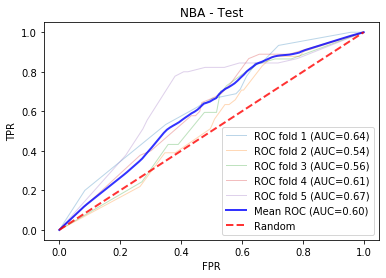

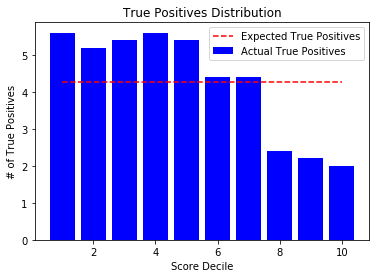

In [16]:
validation_nba.run_cv(rdata, queries_nba, "obesity", 1, 5, "NBA - Test")

### GNB - Factorization #1 (XX - XX)

In [22]:
validation_gnb = Validation(NB())

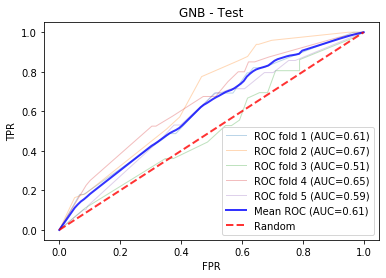

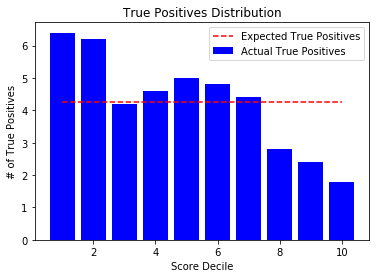

In [23]:
validation_gnb.run_cv(rdata, queries_gnb, "obesity", 1, 5, "GNB - Test")

In [24]:
gnb = NB()

In [26]:
gnb.train(queries_gnb, "obesity", 1, rdata)

In [27]:
gnb.predict(rdata)

In [30]:
tdata_gnb = gnb.predicted_scores.join(gnb.get_predicted_labels()).join(rdata["obesity"]).join(rdata["ejer0_1"], rsuffix='_original').join(rdata["ejer5_10"], rsuffix="_original")

In [32]:
1 - np.sum(tdata_gnb["predicted_obesity"] - tdata_gnb["obesity"]) / tdata_gnb.shape[0]

0.5910543130990416

In [34]:
tdata_gnb[(tdata_gnb.obesity == 0) & (tdata_gnb.predicted_obesity == 1)]

,ejer0_1,ejer5_10,total_score,predicted_obesity,obesity,ejer0_1_original,ejer5_10_original
dp_folio,,,,,,,
2,0.327756,-0.128757,0.198999,1.0,0,BB,AA
5,0.327756,0.130397,0.458153,1.0,0,BB,BB
6,0.130397,0.130397,0.260793,1.0,0,AB,BB
7,0.327756,0.130397,0.458153,1.0,0,BB,BB
11,0.327756,0.130397,0.458153,1.0,0,BB,BB
...,...,...,...,...,...,...,...
1073,0.327756,-0.128757,0.198999,1.0,0,BB,AA
1075,0.327756,-0.128757,0.198999,1.0,0,BB,AA
1078,0.197088,-0.128757,0.068331,1.0,0,BA,AA


In [45]:
gnb.scores_dictionary_full

,feat,cat,class,classcat,score,nx,ncx,nc
0,ejer0_1,AA,obesity,1,-0.838645,283,31,213
1,ejer0_1,AB,obesity,1,0.130397,78,19,213
2,ejer0_1,BA,obesity,1,0.197088,116,30,213
3,ejer0_1,BB,obesity,1,0.327756,462,133,213
4,ejer5_10,AA,obesity,1,-0.128757,389,79,213
5,ejer5_10,AB,obesity,1,-0.367850,93,15,213
6,ejer5_10,BA,obesity,1,0.362590,123,36,213
7,ejer5_10,BB,obesity,1,0.130397,334,83,213


### GNB - Factorization #2 (XXX - X)

In [47]:
buf = np.array(pm.string_generator("", ["A", "B"], 3)).flatten()
hist_posibilities = pm.string_padding("", buf, "")

queries_gnb_2 = {"ejer0_5": hist_posibilities,
                 "ejer10B": ["A", "B"]}

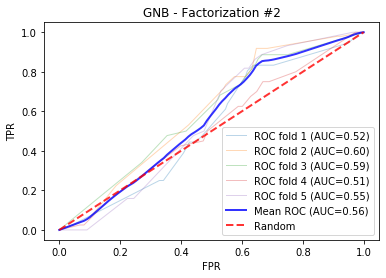

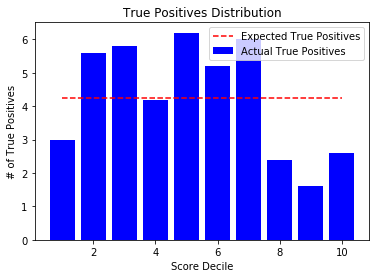

In [52]:
validation_gnb.run_cv(rdata, queries_gnb_2, "obesity", 1, 5, "GNB - Factorization #2")

In [53]:
gnb_2 = NB()

In [54]:
gnb_2.train(queries_gnb_2, "obesity", 1, rdata)

In [55]:
gnb_2.predict(rdata)

In [57]:
gnb_2.scores_dictionary

{'ejer0_5': {'AAA': -0.8011616101857922,
  'AAB': -0.850432659192575,
  'ABA': 0.06585807268157977,
  'ABB': 0.25960832529915756,
  'BAA': 0.2481796294755345,
  'BAB': 0.13039659381915117,
  'BBA': 0.2816275635430748,
  'BBB': 0.3526814074249433},
 'ejer10B': {'A': -0.003852931690812166, 'B': 0.025036078161324832}}